In [63]:
from tensorflow.keras import models, losses, layers
from tensorflow.keras.datasets import cifar100

In [64]:
(X_train, y_train), (X_test,y_test) = cifar100.load_data()

In [65]:
model = models.Sequential()
model.add(layers.Conv2D(256,(3,3), activation = "relu", input_shape = (32,32,3)))
model.add(layers.Dropout(0.2))
model.add(layers.MaxPooling2D((4,4),4))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(100, activation = "softmax"))

model.build()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 256)       7168      
                                                                 
 dropout_2 (Dropout)         (None, 30, 30, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 256)         0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 12544)             0         
                                                                 
 dropout_3 (Dropout)         (None, 12544)             0         
                                                                 
 dense_1 (Dense)             (None, 100)               1254500   
                                                      

In [69]:
model.load_weights('cifar100test.keras')

In [66]:
model.compile(optimizer= "adam", loss= losses.SparseCategoricalCrossentropy(), metrics= "accuracy")

In [70]:


model.fit(X_train,y_train,epochs= 100, batch_size=100, validation_data= (X_test,y_test), steps_per_epoch=100,validation_batch_size=32, shuffle = True, validation_steps= 20)

Epoch 1/100
  6/100 [>.............................] - ETA: 1:05 - loss: 2.3832 - accuracy: 0.4050

KeyboardInterrupt: 

In [ ]:
model.save("cifar100test.keras")

In [ ]:
import json

labels = json.load(open("cifar100labels.json"))

C:\Users\Alexander\AppData\Local\Temp\ipykernel_10324\4011271251.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(f'{labels[pred.argmax()], labels[int(y_test[ind])]}', color = 'green' if pred.argmax() == y_test[ind] else 'red')


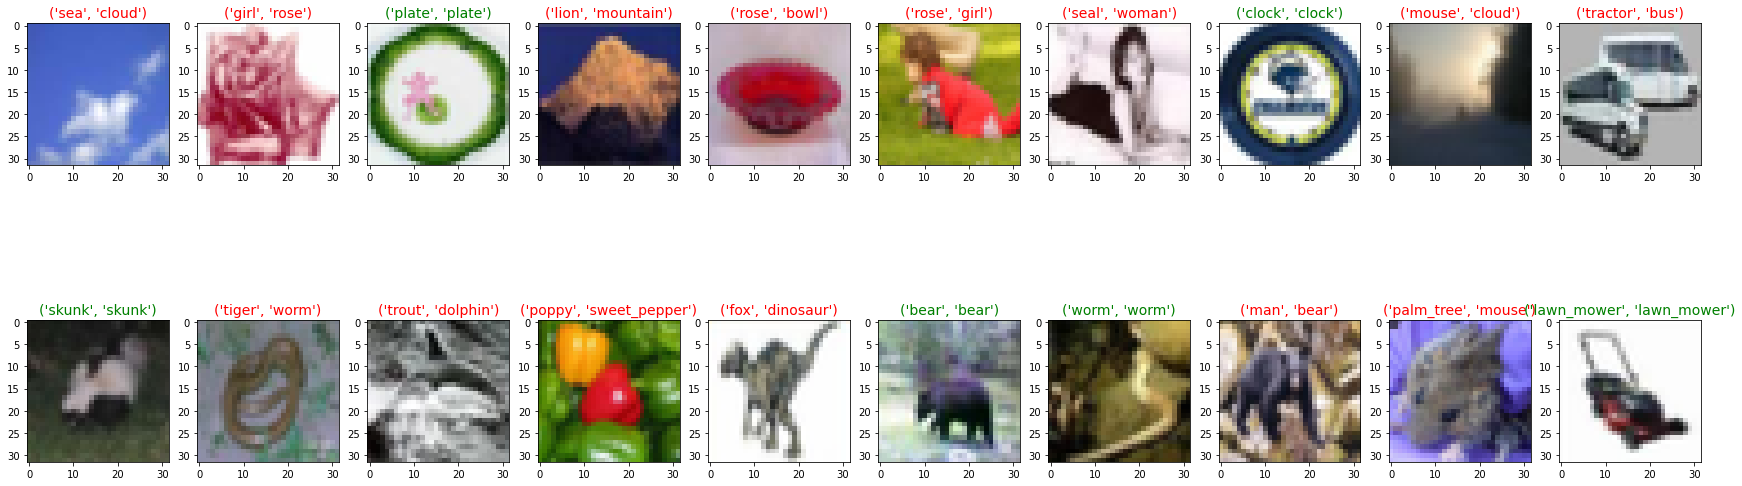

In [71]:
import matplotlib.pyplot as plt
import random
import numpy as np

plt.figure(figsize = [30,10])

plt.rcParams['axes.titlesize'] = 14
for i in range(1,21):
    ax = plt.subplot(2,10,i)
    ind = random.randrange(len(y_test))
    ax.imshow(X_test[ind])
    pred = model.predict(np.expand_dims(X_test[ind], axis = 0), verbose= 0)
    ax.set_title(f'{labels[pred.argmax()], labels[int(y_test[ind])]}', color = 'green' if pred.argmax() == y_test[ind] else 'red')
    

